In [1]:
include("../scripts/robot.jl")

In [2]:
mutable struct EstimationAgent <: AbstractAgent
    nu
    omega
end

In [3]:
function  EstimationAgent_(nu, omega)
    self = EstimationAgent(ntuple(x->nothing, fieldcount(EstimationAgent))...)
    self.nu = nu
    self.omega = omega
    return self
end

EstimationAgent_ (generic function with 1 method)

In [4]:
function draw(self::EstimationAgent, ax, elems)
    elems = vcat(elems, ax.text( 0, 0, "hoge", fontsize=10))
end

draw (generic function with 6 methods)

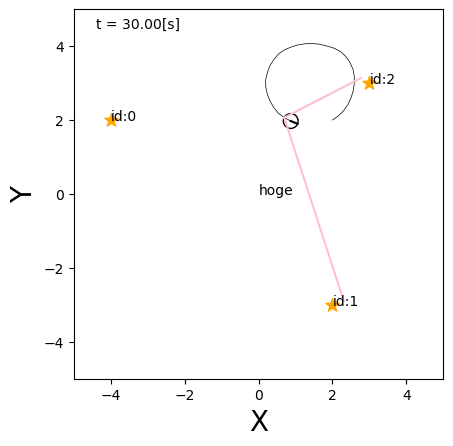

In [5]:
world = World(30, 1.0)

m = Map()
for in in [[-4.0,2.0], [2.0, -3.0], [3.0, 3.0]]
    append_landmark(m, Landmark(in))
end
append(world, m)

initial_pose = [2.0, 2.0, pi/6]
circling = EstimationAgent(0.2, 10.0/180*pi)
r = Robot_(initial_pose, sensor=Camera_(m), agent=circling)
append(world, r)

draw(world)

In [6]:
showanim("test.mp4")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAWaNtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1NyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTggLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAFVtliIQAF//+99S3zLLtU2+2C6j3op4mX0N1JQGblsTtOoAAAAMAAAMAAB68FzgCX4kK868AAAMAyoAXqEn/CmOPiA7BC5NJlvfhKIWPSXi/zA6JYDLoQAMQkginty7NGv2twoUk3+x++sOjYLO23GkLnX3zZEYn6a9vQcRQLf67K7SBvVrJ/o4DfjcfmL80ItpTpOBk9UoqIRYyXX9Jp26SG/qkhzXvDYJnUDUkXMWTV9xgIkId/B0DL63tzWtJoDT3qBLshsubVeON8CDX6ibsLgVVQ4A0D7tGbVkDzT/KsUAH7fA8ber7HvEJfThyzrLkSWNw9QjQzXk0jYHioNxDFOC0u5P/6flbarG27qxKpcR1g3jAe/uyNQkdibir9L1oZNoxCL9nTz5Do7WCxbZi9Ea0fjbwfl2o9ts0w9wdN5MJVeAjp2apf/nrOG4XqhXEOky0ViewaAExu4pV61UcgekdA1z3mTGfHUVi7lbjNjafsSusndiXhSJn8k8VhLU7uYRjxIdQ0M5ROE4eOe0Eev0A9OOL8/r81/6uO/7gObO3O8ikho5Gmu+TSMNye6np8b69hULJzIwzgFY4798RLsws18k5UOAeCwOlWwPO/Yh7LwJnPykhJTN9kY+OpWNFg6l3by+FnBglFK53i/Q76FzranJpKNyMajWn2P0NKgYsg0pdHCtadp/QrLQFGG/Uvsnr/YYD4WRXbXE39PfEt3WXzcLIFejx4Gt+Y5vXjx9188tPzEUQ37Zw/zgwWPNpTzLqavgaCxbScarwxPCvTEfjY2IgWiCV2TAmynCCVycdvV7xluoiPfvQtuifGsCs5YeZ9J8GpdY91b9ZGS2bIeFDnNqmEVKNhTQ1ZbpLevGpqcaYqUq2aJZqun5+76fMIuZBWOyg57h83Eu+5uwLKCuIj79ymNk1XCHAzGKD3YWFWfGN5XRBrCF3tVPXNXbx9HPf8P6AARgAQw+GmrlGkoO/Wptk4p484999hGQJnjkVRaNWpmx91yfhkAMJnm/ijKcebk3F1H2kpsn0kCw48F2x3aP+7vWcmr8RBgdKtu93Pg8f6YlhIRg4yqJ7hRTWdIrfwNHo0P2OYh45MujiyHokxlMOyCYyOJmrGi1Pbr+HEd8S6kRivgnBThXHOb6n89X5zcam54bgihQIAhL6ShJKYQ3N/aMai3EmHqi+C/UXelOzFNGHUnuKsV0PUN4lreBPhyQXhiUkgCeqK3njPpbqKziGxQolG+AJ6LBYWdJIS82dFu3+DZmitsiGM9YHtQwi0ZrNpSL9lJtPBE0IeDp3AQ0HGNmo+nB5g40rkqxROcS7NuwYagd8EG4tw+Vpi5vUeFaoRL5mt+eI78boDSaGjOcQ2GO8qrYa5AWWLV4T08Oc8fsEDfDVcNgHh31Cs3tHFVBNNwuoAn5VTbitqfPZCyAHfLBq61A1mD/Kbu3uM9fZWC/j618lcl1gNm67zqSQ8oLbex1X4KuxLJz077vZvd9Px4971Tkr03z5uzgFhvGFHDUWz/uEGBhLXP6El7VUfomfR4Hsd/UqGhPIE/c/lULWQDZJ9QJO0Hj8wcKRoQ86UNirimekw2jsTu1dGOWpIcNG+8HPWYhxafZ/d/zc7jK451ypgbdbUshbAWnZva9PRYbKq9M8GvzVAltcudGQIe5YsmRzQyH0jXbaXTVAco6srxiVH8vbPELvZ4891JZFKnNXPTpTgydRDuRmN3Dd9T8WtxQ5uBo3XJ+BoCjayTu0QKKQ0J8iK6FNOkdI+eOoZgnYISXWlGTmaX8J+/dTdA9g16fIJUmy2ZCF/5sHgjmeof33m3GgLv+N2gxWCGdoTXDAQX9ZlqE7bwQz9s/QJMfkDtIj9bTnUTeBfhSAbSSOEoODzYOoMSpqXRbPjAp50JXRQURDLFoDwuWDvsG2cZIZSm7uawOwEWkAGtV54291dAinD24ktOsyNNkBxG3mmwUnVHM5QywwAti0yhPucP99QacgFbxkmNPt4fMR5HM4AjhSQOGWczmY+VUFRaX3xCQti2lhopKLZ8EBWsF7HXo7/rvsHRDvGV+mbBjgQfHYlTQeacLSnLHnGx9A1fj3wa2MHDYiwiet5HEhZE6Bsgrohs6EVnJ6K1m8v7nn407GMU6INYywTtovgQeHOoK6MuAlU3tMzjHIHIcTUcSdv+nfQY/Ci/p4XiQKmyuv6MU/QDkBFDDA4HPF/Re7a8uMJeCnNR0mDVUl+WS6Zs27ovh1tS67xKOEokqfufCjEfK7bv6UlwXPaQdbRDka3o6e/IFNAbsy/dSUqaIEyBjF0kNsPiEnuoSFqeCqDBMGUodYjwQzuRAOZRPXtyDmzaFnIpFmR+M78FXn3k8WoaOPx1fNSixeeZl3xkXDEIJN5SDfvdrIVr2ppU20junjseUB2MQfoYuBdcnDfL9Yxea5nBqeOYBXMihNx1G6aSOhmRgt8g7nWF6auGapLlS6mmFHm/uHsMiXT1j7sD7+wjwlLzYGePI9LoW1TcwUUTXR7VO434hjqr+/G1X+yuvoZTlW9n25VPhFUY4kWAbe8WuaurQLfcmgfV5iVknVn3FpUF56vq+Zpni12gox1gVusuMznqDmF6ujmqdo4KGIDa+BdN1JqGA/a3bFD1BA2CYnaO/Ze7XizvugnJOOs//+AI/+NgrAbuzGTitYEoQ+b5mEpriM0Dwzi8B171My4RKwZxnUm8HeGekqmp9r9V5SGOz2PfNzE2uo0e9+I135Xwb5C1Gue8Zoja6P5FNK/Gj+Te1uHWJIF7izhD8ecQGocMpefRtw9zZCxRiB2oXjo35jv5RX8QSRa81acMqBkDi1hWQxVNOhyhHCx7a6+RQXlo4ApYsjbNhIoP73lnyE5yTjRf9fZs8+9J6AIu4z5h9IKuiN3gQhERFED29w8TF80/eORNR1EtbjmEhxEREuoldn+iCGwlVDDhVjzPN2cO5PzTQw4W/wrXUWYF9